In [15]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [16]:
def load_and_preprocess_images(low_res_path, high_res_path, target_size=(64, 64)):
    low_res_images = []
    high_res_images = []

    low_res_files = sorted(os.listdir(low_res_path))
    high_res_files = sorted(os.listdir(high_res_path))

    for low_file, high_file in zip(low_res_files, high_res_files):
        low_img = cv2.imread(os.path.join(low_res_path, low_file), cv2.IMREAD_COLOR)
        high_img = cv2.imread(os.path.join(high_res_path, high_file), cv2.IMREAD_COLOR)

        if low_img is None or high_img is None:
            print(f"Warning: Unable to read images {low_file} or {high_file}. Skipping.")
            continue

        # Resize images to target size
        low_img = cv2.resize(low_img, target_size)
        high_img = cv2.resize(high_img, target_size)

        low_res_images.append(low_img.flatten())
        high_res_images.append(high_img.flatten())

    X = np.array(low_res_images)
    y = np.array(high_res_images)

    return X, y


In [17]:
# Specify your image directories
low_res_path = 'data/lowRes'
high_res_path = 'data/highRes'
x,y =load_and_preprocess_images(low_res_path,high_res_path)
print(x.shape)
print(y.shape)


(100, 12288)
(100, 12288)


In [18]:
x.shape

(100, 12288)

In [19]:
y.shape

(100, 12288)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(80, 12288) (20, 12288) (80, 12288) (20, 12288)


In [21]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [27]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')


Mean Squared Error: 3758.9008


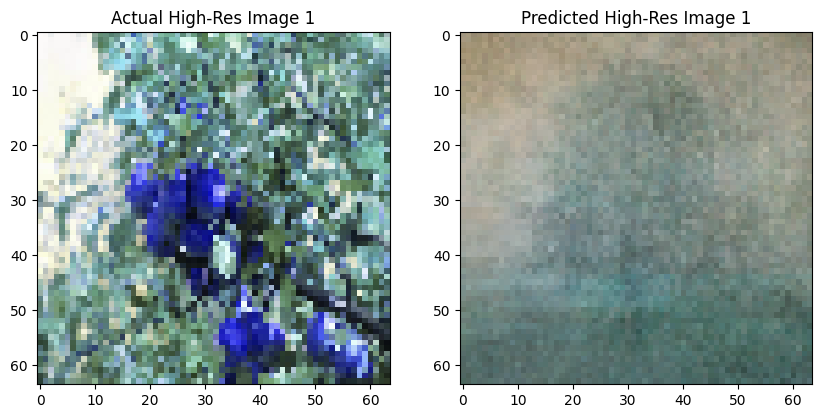

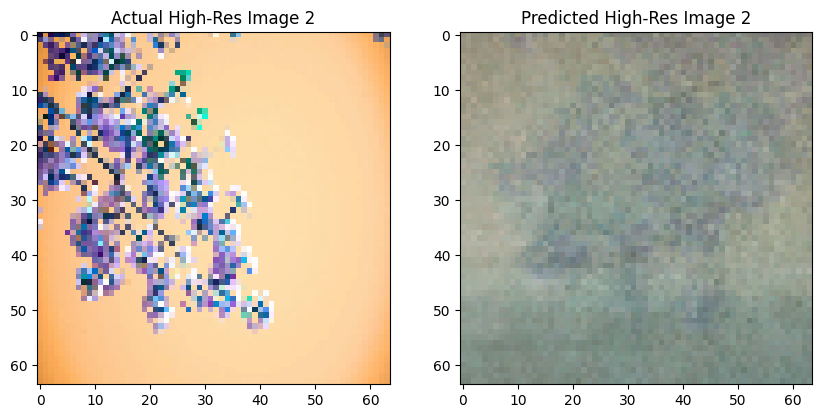

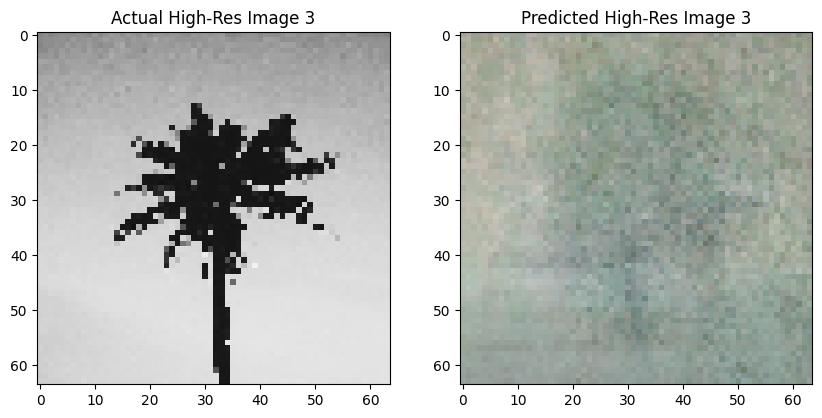

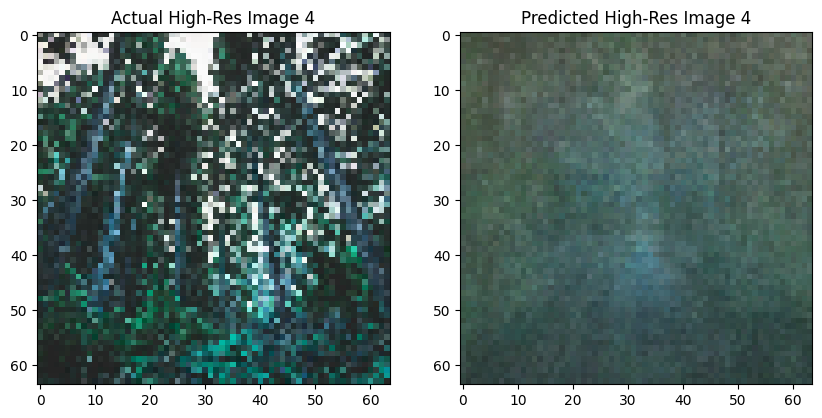

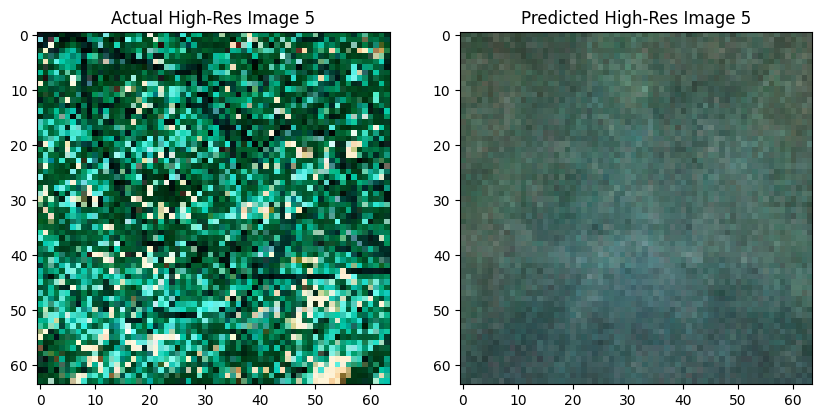

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize a few predictions vs actual images
for i in range(5):
    plt.figure(figsize=(10, 5))

    # Actual high-res image
    plt.subplot(1, 2, 1)
    plt.imshow(y_test[i].reshape(64, 64, 3))  # Reshape to (64, 64, 3) for color images
    plt.title(f'Actual High-Res Image {i+1}')

    # Normalize and reshape the predicted image
    predicted_img = y_pred[i].reshape(64, 64, 3)  # Reshape to (64, 64, 3) for color images
    
    # Ensure predicted values are within the valid range [0, 255]
    predicted_img = np.clip(predicted_img, 0, 255)

    # Predicted high-res image
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_img.astype(np.uint8))  # Ensure the type is uint8 for proper visualization
    plt.title(f'Predicted High-Res Image {i+1}')

    plt.show()


In [25]:
print(f"Predicted image shape: {y_pred[i].shape}")
print(f"Sample pixel values: {y_pred[i].flatten()[:10]}")


Predicted image shape: (12288,)
Sample pixel values: [56.02 76.87 60.92 51.58 79.85 62.73 65.98 90.88 74.36 49.74]


In [30]:
# Save the trained model
import joblib
joblib.dump(rf_model, 'random_forest_super_res_model.pkl')
print("Model saved to 'random_forest_super_res_model.pkl'.")

Model saved to 'random_forest_super_res_model.pkl'.
